# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.
Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too
A relationship between variables Y and X is represented by this equation:

$ Y`i = mX + b $

In this equation, Y is the dependent variable — or the variable we are trying to predict or estimate; X is the independent variable — the variable we are using to make predictions; m is the slope of the regression line — it represent the effect X has on Y. In other words, if X increases by 1 unit, Y will increase by exactly m units.
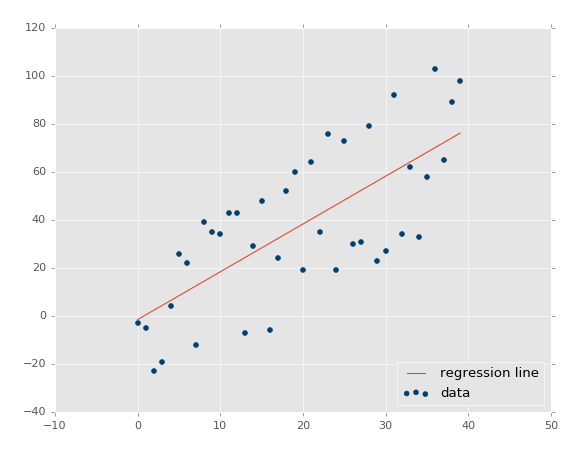

## Import & Install Libraries

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df=pd.read_csv('Real estate.csv')

## Exploratory Data Analysis (EDA)

In [35]:
df.shape

(414, 8)

In [36]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<div class="alert alert-block alert-info">
There is no missing data and noise in dataset.
</div>

In [38]:
# Rename the columns (remove X1..X2..X3.. and Y)
df.columns = ['No','transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


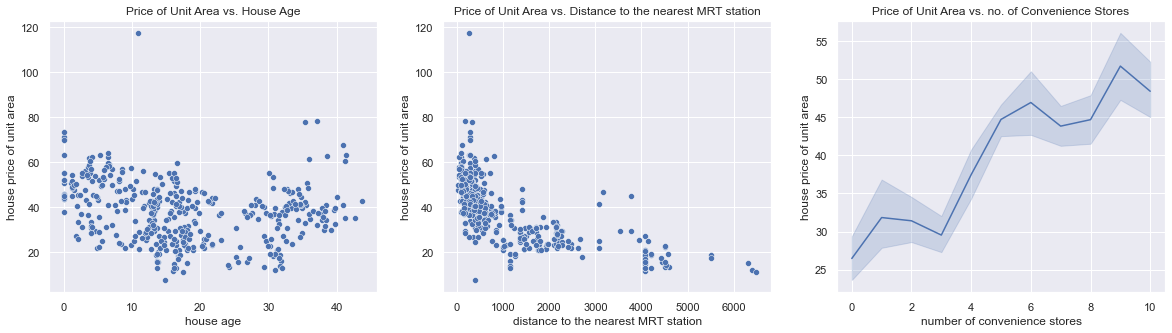

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

sns.set()

sns.scatterplot(data=df, x="house age", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. House Age")

sns.scatterplot(data=df, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=df, x="number of convenience stores", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. no. of Convenience Stores")

plt.show();

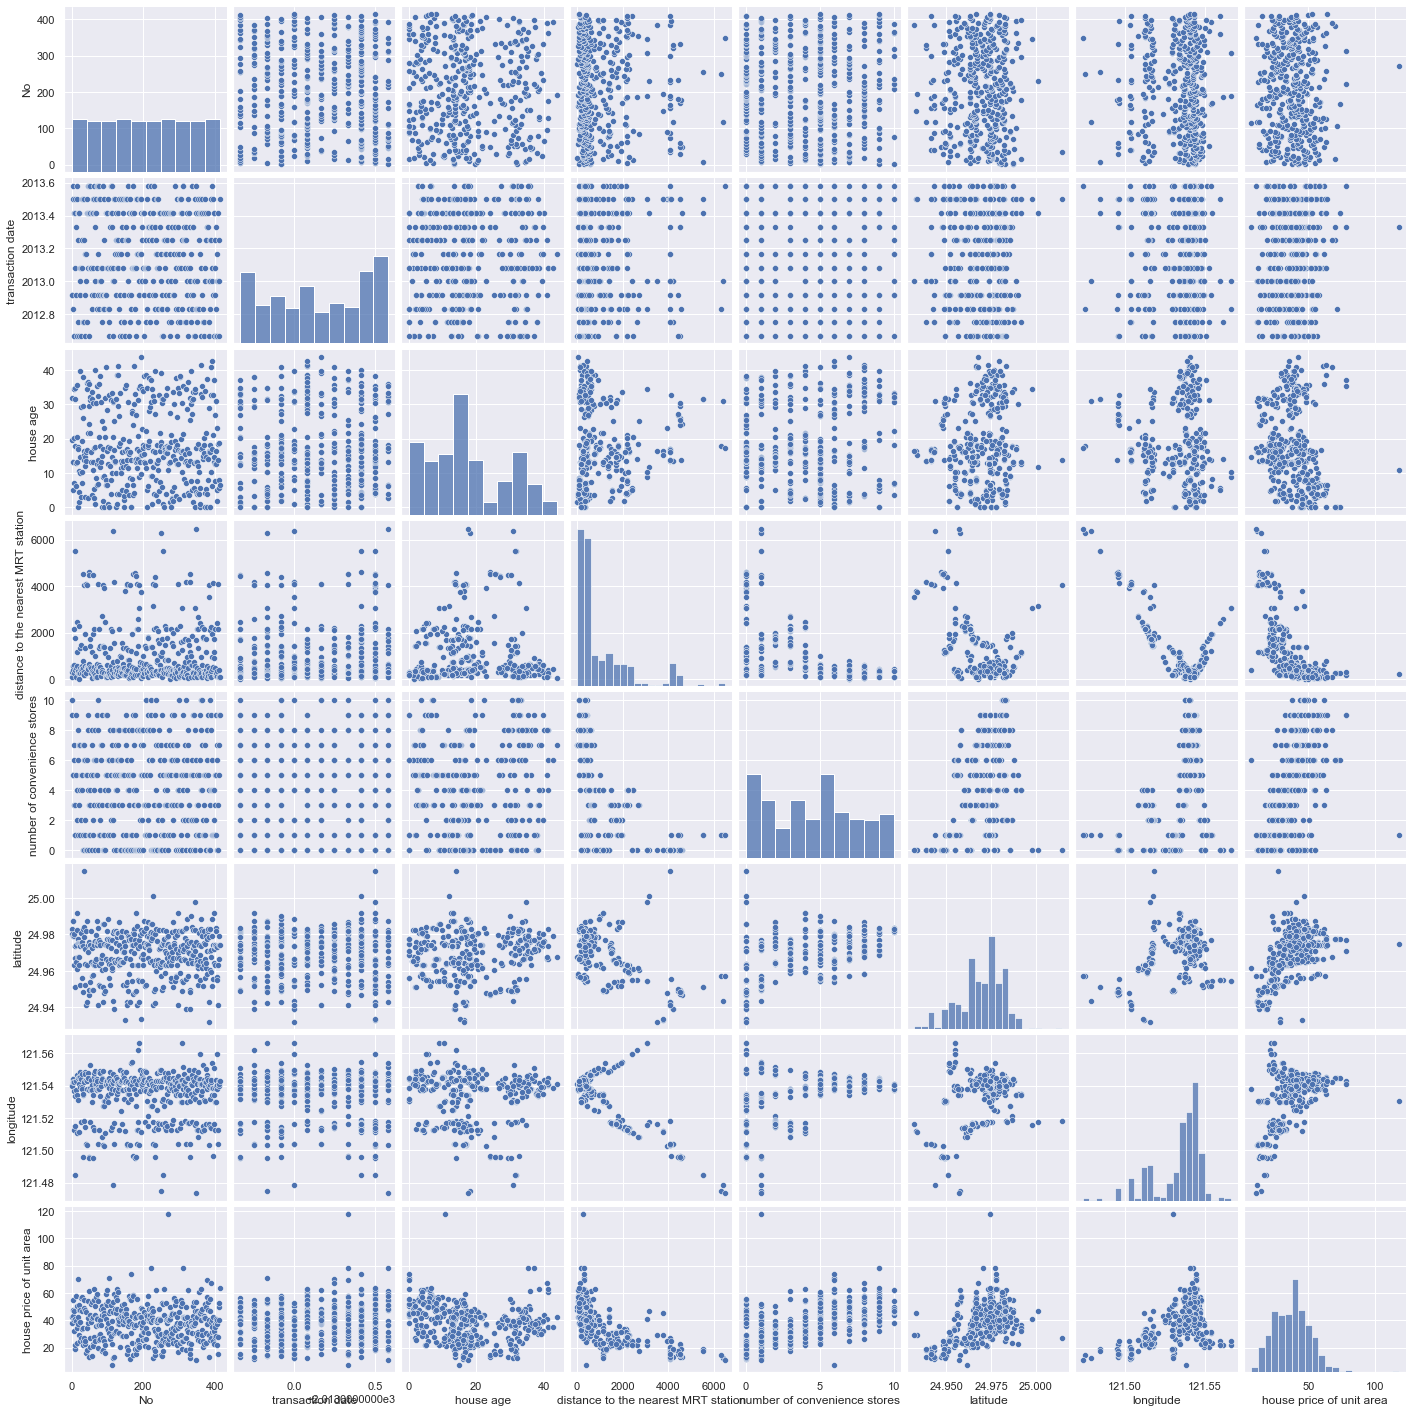

In [40]:
sns.pairplot(df)

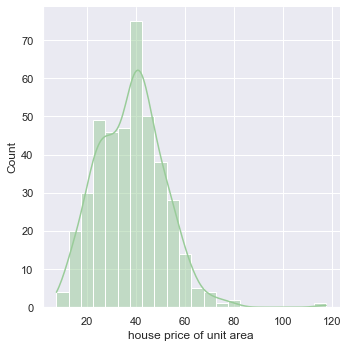

In [41]:
sns.displot(data=df , x='house price of unit area',kde=True, color='#99cc99')

In [42]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

<AxesSubplot:>

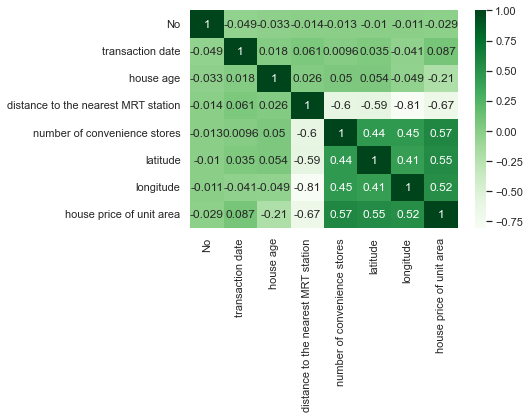

In [43]:
sns.heatmap(df.corr(), annot=True,cmap='Greens')

## Identifying Features and Label

In [51]:
X=df.drop('house price of unit area',axis=1)
y=df['house price of unit area']
X.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [52]:
print(X.shape,"\n", y.shape)

(414, 7) 
 (414,)


## Train/Test Split


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [54]:
print(X_train.shape),
print(y_train.shape),
print(X_test.shape),
print(y_test.shape);

(289, 7)
(289,)
(125, 7)
(125,)


## Train the Model

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [56]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
No,-0.002924
transaction date,4.686684
house age,-0.275675
distance to the nearest MRT station,-0.004249
number of convenience stores,1.178325
latitude,240.947692
longitude,18.669459


In [57]:
X_train.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
266,267,2013.250,17.8,1783.1800,3,24.96731,121.51486
298,299,2013.333,16.7,4082.0150,0,24.94155,121.50381
274,275,2013.167,27.5,394.0173,7,24.97305,121.53994
355,356,2013.250,3.8,383.8624,5,24.98085,121.54391
321,322,2012.917,16.9,964.7496,4,24.98872,121.53411


## Predicting from the Model


In [58]:
y_pred=model.predict(X_test)
pd.DataFrame({'Test': y_test,'Pred':y_pred, 'Residuals':(y_test-y_pred) }).head()

,Test,Pred,Residuals
176,19.2,12.802665,6.397335
347,11.2,9.549151,1.650849
307,24.7,22.516894,2.183106
299,46.1,48.213227,-2.113227
391,31.3,31.972364,-0.672364


## Evaluating the model

__R-squared (R2):__
* R2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

__Mean Absolute Error (MAE) is the mean of the absolute value of the errors:__

* MAE is the easiest to understand, because it's the average error.

__Mean Squared Error (MSE) is the mean of the squared errors:__

* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world

__Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:__

* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [60]:
from sklearn import metrics

In [69]:
R2= metrics.r2_score(y_test, y_pred)
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([R2,MAE, MSE, RMSE], index=['R2','MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
R2,0.653410
MAE,5.373025
MSE,45.880307
RMSE,6.773500


# Compare the metrics to the mean of target variable


In [62]:
df['house price of unit area'].mean()

37.98019323671498

# Residuals

A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

In [63]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y-Pred')

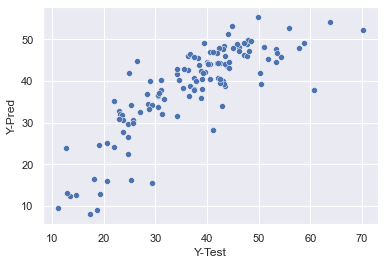

In [64]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')


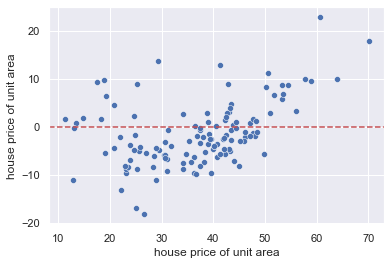

In [65]:
test_residuals=y_test-y_pred

sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

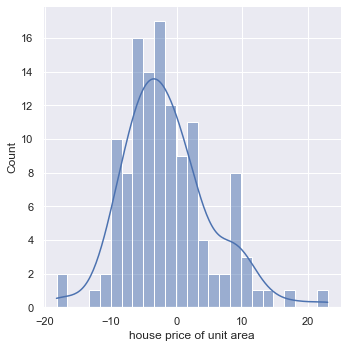

In [66]:
sns.displot(test_residuals, bins=25, kde=True)

In [67]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\16474\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


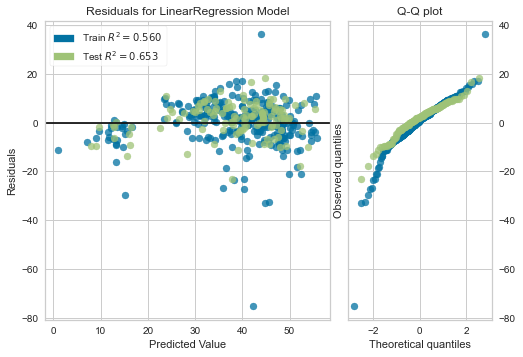

In [68]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();